<h1><center>This Notebook Contains LSTM based Text Generation using Tensorflow</center></h1>

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

In [2]:
tokenizer = Tokenizer()

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [3]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [4]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [5]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [6]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [7]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 23s 1ms/sample - loss: 6.9087 - accuracy: 0.0224
Epoch 2/100
15462/15462 [==============================] - 8s 531us/sample - loss: 6.5031 - accuracy: 0.0210
Epoch 3/100
15462/15462 [==============================] - 8s 531us/sample - loss: 6.4168 - accuracy: 0.0237
Epoch 4/100
15462/15462 [==============================] - 8s 532us/sample - loss: 6.3022 - accuracy: 0.0306
Epoch 5/100
15462/15462 [==============================] - 8s 532us/sample - loss: 6.1938 - accuracy: 0.0356
Epoch 6/100
15462/15462 [==============================] - 9s 595us/sample - loss: 6.1119 - accuracy: 0.0371
Epoch 7/100
15462/15462 [==============================] - 9s 608us/sample - loss: 6.0372 - accuracy: 0.0404
Epoch 8/100
15462/15462 [==============================] - 11s 688us/sample - loss: 5.9602 - accuracy: 0.0435
Epoch 9/100
15462/15462 [==============================] - 8s 543us/sample - loss: 5.8713 - accuracy: 0.0

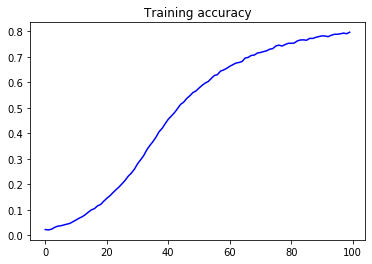

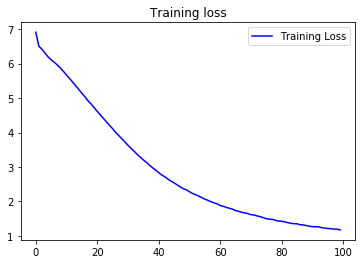

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [9]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

In [10]:
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope up but still alone like her due to say your it is not so write for thine eye is a lips of youth a devil dear complexion hate can moan thee out that pleasure for mine eye when he was fullness remain light another way days lies fire eyes prove thy chest tell grow lack lack lack waste new new old old account of thine own eyes lies enemies to kings desire from bear least sea's height days spread stand every foul pride show thee let me have remove do live my deeds of thee will keep there doth shown
